In [52]:
#Importing Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')


In [53]:
# #Mounting GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive/')

In [54]:
#Reading the file
# df = pd.read_excel("/content/drive/MyDrive/Datasets/CocaCola_Sales_Rawdata.xlsx")
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [55]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [56]:
df.shape

(42, 2)

In [57]:
#Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [58]:
#Checking for Null Values
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [59]:
#Split the 'Quarter' column into two columns
df[['Quarter', 'Year']] = df['Quarter'].str.split('_', expand=True)

In [60]:
#Prepend 's' to the 'Year' column
df['Year'] = 's' + df['Year']

In [61]:
print(df)

   Quarter        Sales Year
0       Q1  1734.827000  s86
1       Q2  2244.960999  s86
2       Q3  2533.804993  s86
3       Q4  2154.962997  s86
4       Q1  1547.818996  s87
5       Q2  2104.411995  s87
6       Q3  2014.362999  s87
7       Q4  1991.746998  s87
8       Q1  1869.049999  s88
9       Q2  2313.631996  s88
10      Q3  2128.320000  s88
11      Q4  2026.828999  s88
12      Q1  1910.603996  s89
13      Q2  2331.164993  s89
14      Q3  2206.549995  s89
15      Q4  2173.967995  s89
16      Q1  2148.278000  s90
17      Q2  2739.307999  s90
18      Q3  2792.753998  s90
19      Q4  2556.009995  s90
20      Q1  2480.973999  s91
21      Q2  3039.522995  s91
22      Q3  3172.115997  s91
23      Q4  2879.000999  s91
24      Q1  2772.000000  s92
25      Q2  3550.000000  s92
26      Q3  3508.000000  s92
27      Q4  3243.859993  s92
28      Q1  3056.000000  s93
29      Q2  3899.000000  s93
30      Q3  3629.000000  s93
31      Q4  3373.000000  s93
32      Q1  3352.000000  s94
33      Q2  43

In [62]:
#Mapping of quarters to months
quarter_to_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}


In [63]:
#Creating new month column by mapping the Quarter location
df['Month'] = df['Quarter'].map(quarter_to_month)

print(df)

   Quarter        Sales Year  Month
0       Q1  1734.827000  s86      1
1       Q2  2244.960999  s86      4
2       Q3  2533.804993  s86      7
3       Q4  2154.962997  s86     10
4       Q1  1547.818996  s87      1
5       Q2  2104.411995  s87      4
6       Q3  2014.362999  s87      7
7       Q4  1991.746998  s87     10
8       Q1  1869.049999  s88      1
9       Q2  2313.631996  s88      4
10      Q3  2128.320000  s88      7
11      Q4  2026.828999  s88     10
12      Q1  1910.603996  s89      1
13      Q2  2331.164993  s89      4
14      Q3  2206.549995  s89      7
15      Q4  2173.967995  s89     10
16      Q1  2148.278000  s90      1
17      Q2  2739.307999  s90      4
18      Q3  2792.753998  s90      7
19      Q4  2556.009995  s90     10
20      Q1  2480.973999  s91      1
21      Q2  3039.522995  s91      4
22      Q3  3172.115997  s91      7
23      Q4  2879.000999  s91     10
24      Q1  2772.000000  s92      1
25      Q2  3550.000000  s92      4
26      Q3  3508.000000  s92

In [64]:
df['Year'] = '19' + df['Year'].astype(str)
df['Month_Year'] = df['Month'].astype(str) + '/' + df['Year'].astype(str)

print(df)

   Quarter        Sales   Year  Month Month_Year
0       Q1  1734.827000  19s86      1    1/19s86
1       Q2  2244.960999  19s86      4    4/19s86
2       Q3  2533.804993  19s86      7    7/19s86
3       Q4  2154.962997  19s86     10   10/19s86
4       Q1  1547.818996  19s87      1    1/19s87
5       Q2  2104.411995  19s87      4    4/19s87
6       Q3  2014.362999  19s87      7    7/19s87
7       Q4  1991.746998  19s87     10   10/19s87
8       Q1  1869.049999  19s88      1    1/19s88
9       Q2  2313.631996  19s88      4    4/19s88
10      Q3  2128.320000  19s88      7    7/19s88
11      Q4  2026.828999  19s88     10   10/19s88
12      Q1  1910.603996  19s89      1    1/19s89
13      Q2  2331.164993  19s89      4    4/19s89
14      Q3  2206.549995  19s89      7    7/19s89
15      Q4  2173.967995  19s89     10   10/19s89
16      Q1  2148.278000  19s90      1    1/19s90
17      Q2  2739.307999  19s90      4    4/19s90
18      Q3  2792.753998  19s90      7    7/19s90
19      Q4  2556.009

In [65]:
#Extract month , year and add '19' to the year

df['Month'] = df['Month_Year'].str.extract(r'(\d+)/')
df['Year'] = '19' + df['Month_Year'].str.extract(r's(\d+)$')


In [66]:
# Create a new 'Date' column by combining 'Month' and 'Year'
df['Date'] = pd.to_datetime(df['Month'] + df['Year'], format='%m%Y')

print(df)


   Quarter        Sales  Year Month Month_Year       Date
0       Q1  1734.827000  1986     1    1/19s86 1986-01-01
1       Q2  2244.960999  1986     4    4/19s86 1986-04-01
2       Q3  2533.804993  1986     7    7/19s86 1986-07-01
3       Q4  2154.962997  1986    10   10/19s86 1986-10-01
4       Q1  1547.818996  1987     1    1/19s87 1987-01-01
5       Q2  2104.411995  1987     4    4/19s87 1987-04-01
6       Q3  2014.362999  1987     7    7/19s87 1987-07-01
7       Q4  1991.746998  1987    10   10/19s87 1987-10-01
8       Q1  1869.049999  1988     1    1/19s88 1988-01-01
9       Q2  2313.631996  1988     4    4/19s88 1988-04-01
10      Q3  2128.320000  1988     7    7/19s88 1988-07-01
11      Q4  2026.828999  1988    10   10/19s88 1988-10-01
12      Q1  1910.603996  1989     1    1/19s89 1989-01-01
13      Q2  2331.164993  1989     4    4/19s89 1989-04-01
14      Q3  2206.549995  1989     7    7/19s89 1989-07-01
15      Q4  2173.967995  1989    10   10/19s89 1989-10-01
16      Q1  21

In [67]:
#Creating the Dummy Variables
Quarters=["Q1","Q2","Q3","Q4"]

p = df["Quarter"][0]
p[0:2]

df["quarter"]=0
df["Year"]=0

for i in range(42):
    p = df.loc[i, 'Quarter']
    df.loc[i,'quarter']= p[0:2]

for i in range(42):
    p = df.loc[i, 'Quarter']
    df.loc[i,'Year']= p[3:]

month_dummies =pd.get_dummies(df['quarter'])
month_dummies

df_Dummy=pd.concat([df,month_dummies],axis=1)
df_Dummy


,Quarter,Sales,Year,Month,Month_Year,Date,quarter,Q1,Q2,Q3,Q4
0,Q1,1734.827000,,1,1/19s86,1986-01-01,Q1,1,0,0,0
1,Q2,2244.960999,,4,4/19s86,1986-04-01,Q2,0,1,0,0
2,Q3,2533.804993,,7,7/19s86,1986-07-01,Q3,0,0,1,0
3,Q4,2154.962997,,10,10/19s86,1986-10-01,Q4,0,0,0,1
4,Q1,1547.818996,,1,1/19s87,1987-01-01,Q1,1,0,0,0
5,Q2,2104.411995,,4,4/19s87,1987-04-01,Q2,0,1,0,0
6,Q3,2014.362999,,7,7/19s87,1987-07-01,Q3,0,0,1,0
7,Q4,1991.746998,,10,10/19s87,1987-10-01,Q4,0,0,0,1
8,Q1,1869.049999,,1,1/19s88,1988-01-01,Q1,1,0,0,0
9,Q2,2313.631996,,4,4/19s88,1988-04-01,Q2,0,1,0,0


In [68]:
df_Dummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     42 non-null     object        
 1   Sales       42 non-null     float64       
 2   Year        42 non-null     object        
 3   Month       42 non-null     object        
 4   Month_Year  42 non-null     object        
 5   Date        42 non-null     datetime64[ns]
 6   quarter     42 non-null     object        
 7   Q1          42 non-null     uint8         
 8   Q2          42 non-null     uint8         
 9   Q3          42 non-null     uint8         
 10  Q4          42 non-null     uint8         
dtypes: datetime64[ns](1), float64(1), object(5), uint8(4)
memory usage: 2.6+ KB


In [69]:
#we are creating the additional columns for time series forecasting. By creating these additional columns, you may be preparing the data for a time series forecasting model. The 't' column represents the time index, 't_square' captures quadratic trends, and 'Log_Sales' is a transformed version of the original sales data that may be more suitable for certain types of models, especially if the original sales data exhibits multiplicative or exponential patterns."""
df_Dummy["t"]=np.arange(1,43)

df_Dummy["t_square"]=np.square(df_Dummy["t"])

df_Dummy["Log_Sales"]=np.log(df_Dummy["Sales"])

df_Dummy

,Quarter,Sales,Year,Month,Month_Year,Date,quarter,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1,1734.827000,,1,1/19s86,1986-01-01,Q1,1,0,0,0,1,1,7.458663
1,Q2,2244.960999,,4,4/19s86,1986-04-01,Q2,0,1,0,0,2,4,7.716443
2,Q3,2533.804993,,7,7/19s86,1986-07-01,Q3,0,0,1,0,3,9,7.837477
3,Q4,2154.962997,,10,10/19s86,1986-10-01,Q4,0,0,0,1,4,16,7.675529
4,Q1,1547.818996,,1,1/19s87,1987-01-01,Q1,1,0,0,0,5,25,7.344602
5,Q2,2104.411995,,4,4/19s87,1987-04-01,Q2,0,1,0,0,6,36,7.651791
6,Q3,2014.362999,,7,7/19s87,1987-07-01,Q3,0,0,1,0,7,49,7.608058
7,Q4,1991.746998,,10,10/19s87,1987-10-01,Q4,0,0,0,1,8,64,7.596767
8,Q1,1869.049999,,1,1/19s88,1988-01-01,Q1,1,0,0,0,9,81,7.533186
9,Q2,2313.631996,,4,4/19s88,1988-04-01,Q2,0,1,0,0,10,100,7.746574


<Axes: >

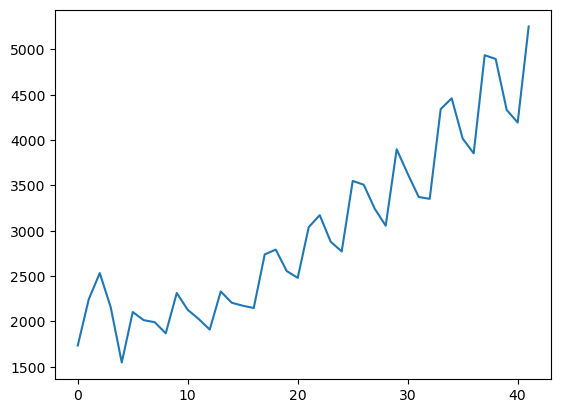

In [70]:
df_Dummy.Sales.plot()

**Exploratory Data Analysis(EDA)**

<Axes: >

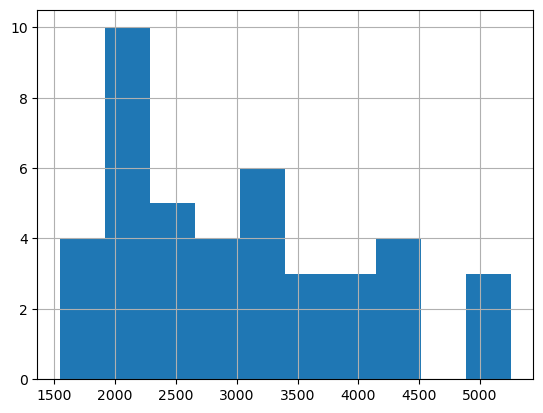

In [71]:
#Histogram
df.Sales.hist()

<Axes: xlabel='quarter', ylabel='Date'>

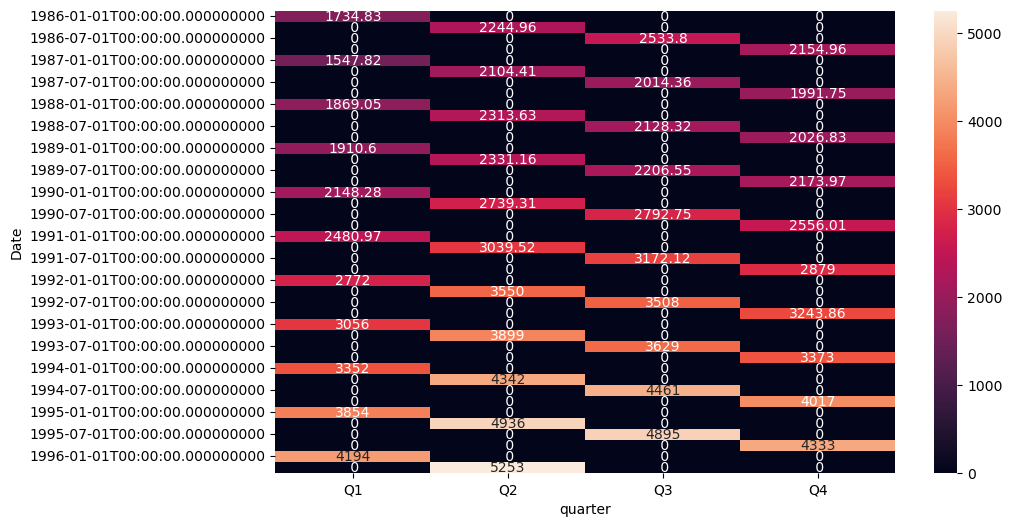

In [72]:
#Heat Map
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=df_Dummy,values="Sales",index="Date",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

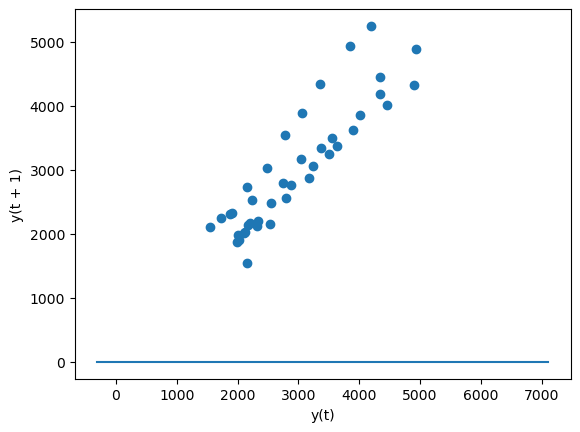

In [73]:
#Density plot and Lag plot

df_Dummy.Sales.plot(kind='kde')
     
lag_plot(df_Dummy.Sales)


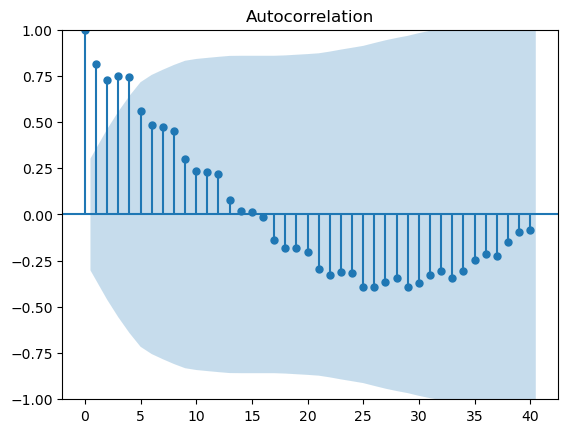

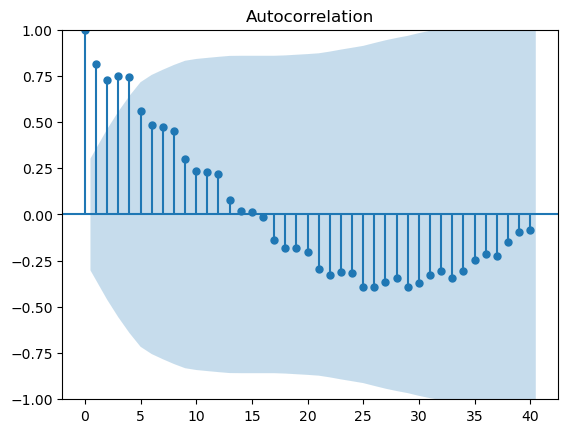

In [74]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_Dummy.Sales,lags=40)

<Axes: xlabel='Year', ylabel='Sales'>

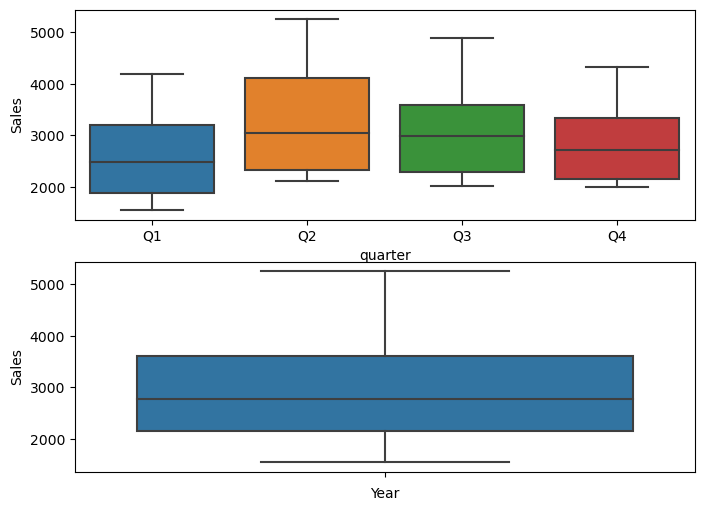

In [75]:
# Boxplot 

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=df_Dummy)

plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=df_Dummy)

<Axes: xlabel='quarter', ylabel='Sales'>

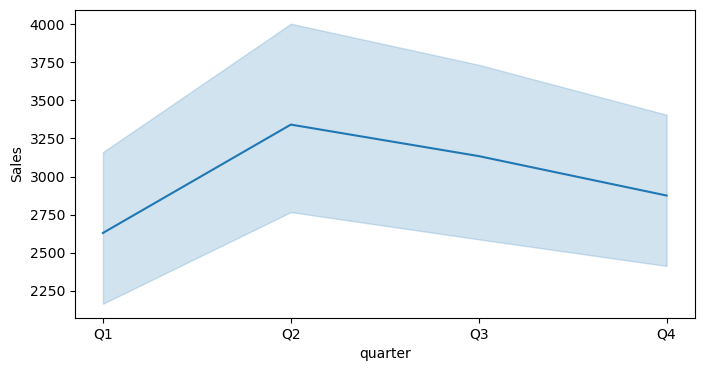

In [76]:
#Line Plot

plt.figure(figsize=(8,4))
sns.lineplot(x="quarter",y="Sales",data=df_Dummy)

In [77]:
#Splitting the Data into train and test

train=df_Dummy.head(int(len(df_Dummy.quarter)*0.9))
test=df_Dummy.tail(len(df_Dummy.quarter)-len(train))

train

,Quarter,Sales,Year,Month,Month_Year,Date,quarter,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1,1734.827000,,1,1/19s86,1986-01-01,Q1,1,0,0,0,1,1,7.458663
1,Q2,2244.960999,,4,4/19s86,1986-04-01,Q2,0,1,0,0,2,4,7.716443
2,Q3,2533.804993,,7,7/19s86,1986-07-01,Q3,0,0,1,0,3,9,7.837477
3,Q4,2154.962997,,10,10/19s86,1986-10-01,Q4,0,0,0,1,4,16,7.675529
4,Q1,1547.818996,,1,1/19s87,1987-01-01,Q1,1,0,0,0,5,25,7.344602
5,Q2,2104.411995,,4,4/19s87,1987-04-01,Q2,0,1,0,0,6,36,7.651791
6,Q3,2014.362999,,7,7/19s87,1987-07-01,Q3,0,0,1,0,7,49,7.608058
7,Q4,1991.746998,,10,10/19s87,1987-10-01,Q4,0,0,0,1,8,64,7.596767
8,Q1,1869.049999,,1,1/19s88,1988-01-01,Q1,1,0,0,0,9,81,7.533186
9,Q2,2313.631996,,4,4/19s88,1988-04-01,Q2,0,1,0,0,10,100,7.746574


In [78]:
test

,Quarter,Sales,Year,Month,Month_Year,Date,quarter,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
37,Q2,4936.0,,4,4/19s95,1995-04-01,Q2,0,1,0,0,38,1444,8.504311
38,Q3,4895.0,,7,7/19s95,1995-07-01,Q3,0,0,1,0,39,1521,8.495970
39,Q4,4333.0,,10,10/19s95,1995-10-01,Q4,0,0,0,1,40,1600,8.374015
40,Q1,4194.0,,1,1/19s96,1996-01-01,Q1,1,0,0,0,41,1681,8.341410
41,Q2,5253.0,,4,4/19s96,1996-04-01,Q2,0,1,0,0,42,1764,8.566555


In [79]:
#Linear Model
import statsmodels.formula.api as smf
Linear_model=smf.ols("Sales~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Sales"]-np.array(pred_linear))**2)
rmse_linear


613.088579779634

In [80]:
#Exponential
exp_model=smf.ols("Log_Sales~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Sales"])-(np.array(pred_exp_model)))**2)
rmse_exp_model


4713.8306396253665

In [81]:
#Quadratic
Quad=smf.ols("Sales~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Sales"])-(np.array(pred_Quad)))**2)
rmse_Quad


37.603993337860814

In [82]:
#Additive seasonality
Add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_add_sea)))**2)
rmse_add_sea


1916.7936732906753

In [83]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Q1","Q2","Q3","Q4"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Sales"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad


108.68666897486692

In [84]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Sales","Q1","Q2","Q3","Q4"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Sales"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea


2009.5556325551377

In [85]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Sales~t+Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea


4713.803270264603

In [86]:
# Fit ARIMA model
""" setting our Month column as index """
df.set_index('Date',inplace = True)
df.head()


,Quarter,Sales,Year,Month,Month_Year,quarter
Date,,,,,,
1986-01-01,Q1,1734.827000,,1,1/19s86,Q1
1986-04-01,Q2,2244.960999,,4,4/19s86,Q2
1986-07-01,Q3,2533.804993,,7,7/19s86,Q3
1986-10-01,Q4,2154.962997,,10,10/19s86,Q4
1987-01-01,Q1,1547.818996,,1,1/19s87,Q1


<Axes: xlabel='Date'>

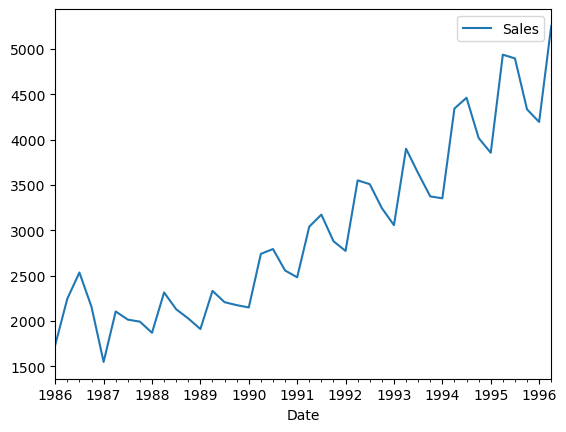

In [87]:
""" observing how our initial data is plotted over graph to check seasonality( to be precise) """

df.plot()


as we can observe the graph overall the mean and standard deviation gets increasing and there is seasonality here 
in the depicted graph so there is no statinarity over here 

In [88]:
#importing the necessary package for dickey fuller test  """

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
       print("Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary")
    else:
       print("Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary")


adf_test(df['Sales'])


ADF Statistics: 1.3094210153268104
p-value: 0.9966611673930905
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


In [89]:
#Using Techniques differencing
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)
df.head()

adf_test(df['Sales First Difference'].dropna())


ADF Statistics: -2.5015370020337997
p-value: 0.11510080332405515
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


data is still not stationary

In [90]:
#Using second differencing technique
df['Sales Second Difference'] = df['Sales First Difference']-df['Sales First Difference'].shift(1)

adf_test(df['Sales Second Difference'].dropna())


ADF Statistics: -27.63262494638169
p-value: 0.0
Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


Data is stationary

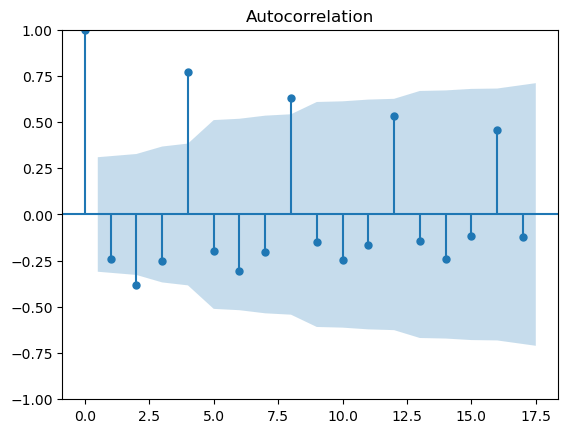

In [91]:
acf = plot_acf(df['Sales Second Difference'].dropna())

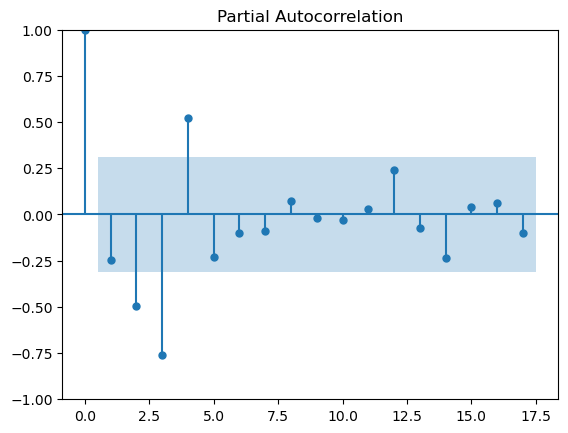

In [92]:
pacf = plot_pacf(df['Sales Second Difference'].dropna())

In [93]:
arima_model = ARIMA(train['Sales'], order=(3, 2, 3))
arima_fit = arima_model.fit()

In [94]:
# Make predictions on the test set
arima_predictions = arima_fit.forecast(steps=len(test))
arima_predictions

37    4702.491113
38    4859.572080
39    4439.802291
40    4327.914365
41    5123.662794
Name: predicted_mean, dtype: float64

In [95]:
# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(test['Sales'], arima_predictions))
print('RMSE (ARIMA):', rmse_arima)


RMSE (ARIMA): 142.72311453235525


In [96]:
arima_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   37
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -234.434
Date:                Sun, 04 Feb 2024   AIC                            482.869
Time:                        12:01:09   BIC                            493.756
Sample:                             0   HQIC                           486.627
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9511      0.077    -12.382      0.000      -1.102      -0.801
ar.L2         -0.9871      0.087    -11.372      0.000      -1.157      -0.817
ar.L3         -0.9127      0.094     -9.689      0.000      -1.097      -0.728
ma.L1         -0.1533      0.263     -0.582      0.560      -0.669       0.363
ma.L2         -0.2068      0.319     -0.649      0.516      -0.831       0.418
ma.L3         -0.2616      0.418     -0.625      0.532      -1.082       0.559
sigma2       2.88e+04   7540.532      3.820      0.000     1.4e+04    4.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.83   Prob(JB):                         0.96
Heteroskedasticity (H):               0.62   Skew:                            -0.08
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
# Fit SARIMA model
sarima_model = SARIMAX(train['Sales'], order=(3, 2, 3), seasonal_order=(0, 0, 0, 12))
sarima_fit = sarima_model.fit()

In [98]:
# Make predictions on the test set
sarima_predictions = sarima_fit.forecast(steps=len(test))
sarima_predictions

37    4702.491113
38    4859.572080
39    4439.802291
40    4327.914365
41    5123.662794
Name: predicted_mean, dtype: float64

In [99]:
# Calculate RMSE
rmse_sarima = np.sqrt(mean_squared_error(test['Sales'], sarima_predictions))
print('RMSE (SARIMA):', rmse_sarima)


RMSE (SARIMA): 142.72311453235525


In [100]:
# Optional: Print model summary
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   37
Model:               SARIMAX(3, 2, 3)   Log Likelihood                -234.434
Date:                Sun, 04 Feb 2024   AIC                            482.869
Time:                        12:01:10   BIC                            493.756
Sample:                             0   HQIC                           486.627
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9511      0.077    -12.382      0.000      -1.102      -0.801
ar.L2         -0.9871      0.087    -11.372      0.000      -1.157      -0.817
ar.L3         -0.9127      0.094     -9.689      0.000      -1.097      -0.728
ma.L1         -0.1533      0.263     -0.582      0.560      -0.669       0.363
ma.L2         -0.2068      0.319     -0.649      0.516      -0.831       0.418
ma.L3         -0.2616      0.418     -0.625      0.532      -1.082       0.559
sigma2       2.88e+04   7540.532      3.820      0.000     1.4e+04    4.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.83   Prob(JB):                         0.96
Heteroskedasticity (H):               0.62   Skew:                            -0.08
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea","rmse_ARIMA","rmse_SARIMAX"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea,rmse_arima,rmse_sarima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
2,rmse_Quad,37.603993
4,rmse_add_sea_quad,108.686669
7,rmse_ARIMA,142.723115
8,rmse_SARIMAX,142.723115
0,rmse_linear,613.088580
3,rmse_add_sea,1916.793673
5,rmse_Mult_sea,2009.555633
6,rmse_mul_add_sea,4713.803270
1,rmse_exp_model,4713.830640


**QUADRATIC MODEL GIVES US THE BETTER RESULTS THAN REST OF THE MODELS APPLIED FOR GIVEN DATASET**